In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=25

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "chest_x_ray_aug",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 13977 files belonging to 2 classes.


In [5]:
class_names = dataset.class_names
class_names

['train', 'valid']

In [6]:
len(dataset)

437

In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 600, 600, 3)
[1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1]


In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy().min())
    print(image_batch[0].numpy().max())

0.0
255.0


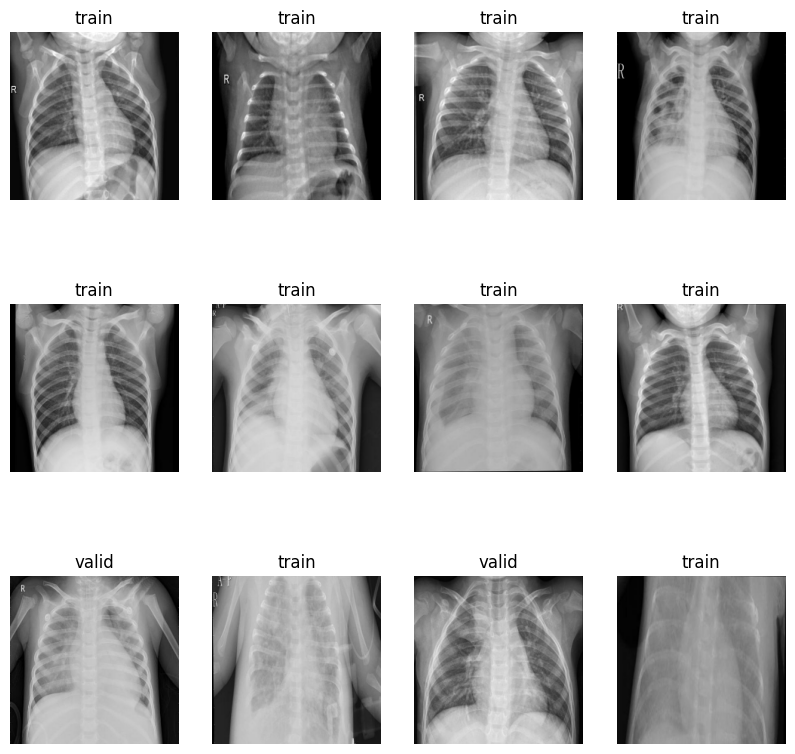

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [10]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [13]:
train_size = 0.8
len(dataset)*train_size

146.4

In [14]:
train_ds = dataset.take(146)
len(train_ds)

146

In [15]:
test_ds = dataset.skip(146)
len(test_ds)

37

In [16]:
val_size = 0.1
len(dataset)*val_size

18.3

In [17]:
val_ds = test_ds.take(18)
len(val_ds)

18

In [18]:
test_ds = test_ds.skip(18)
len(test_ds)

19

In [19]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [20]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [21]:
len(val_ds)

18

In [22]:
len(test_ds)

19

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=2

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 600, 600, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 600, 600, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 598, 598, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 299, 299, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 297, 297, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 148, 148, 64)        0         
 g2D)                                                 

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50


146/146 [==============================] - ETA: 0s - loss: 0.5531 - accuracy: 0.7434

: 

: 